In [9]:
import fastf1 as ff1
import matplotlib.pyplot as plt
import numpy as np

In [10]:
session = ff1.get_session(2023, 'Monza', 'Q')  # Esempio: Qualifiche del Gran Premio d'Italia 2023
session.load()

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.4.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2023/14/qualifying.json failed; using cached response
Traceback (most recent call last):
  File "c:\Users\calin\OneDrive\Desktop\Develhope\Ex\FASTF1\.venv\lib\site-packages\urllib3\connectionpool.py", line 534, in _make_request
    response = conn.getresponse()
  File "c:\Users\calin\OneDrive\Desktop\Develhope\Ex\FASTF1\.venv\lib\site-packages\urllib3\connection.py", line 516, in getresponse
    httplib_response = super().getresponse()
  File "C:\Users\calin\AppData\Local\Programs\Python\Python310\lib\http\client.py", line 1374, in getresponse
    response.begin()
  File "C:\Users\calin\AppData\Local\Programs\Python\Python310\lib\http\client.py", line 318, in begin
    version, status, reason = self._read_status()
  File "C:\Users\calin\AppData\Local\Program

In [11]:
lap = session.laps.pick_driver('VER').pick_fastest()
lap2 = session.laps.pick_driver('LEC').pick_fastest()
telemetry = lap.get_telemetry()
telemetry2 = lap2.get_telemetry()
pos = lap.get_pos_data()

c:\Users\calin\OneDrive\Desktop\Develhope\Ex\FASTF1\.venv\lib\site-packages\fastf1\core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
c:\Users\calin\OneDrive\Desktop\Develhope\Ex\FASTF1\.venv\lib\site-packages\fastf1\core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


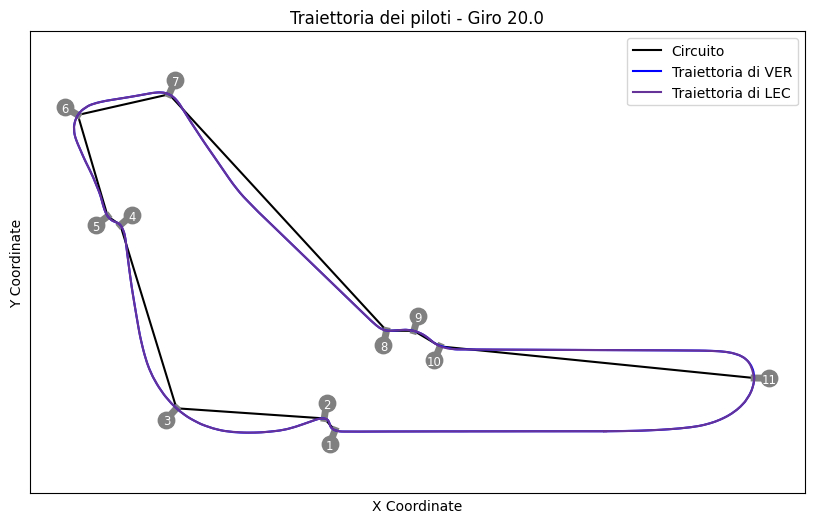

In [16]:
# Funzione per ruotare i punti
def rotate(xy, *, angle):
    rot_mat = np.array([[np.cos(angle), np.sin(angle)],
                        [-np.sin(angle), np.cos(angle)]])
    return np.matmul(xy, rot_mat)

# Converti l'angolo di rotazione del circuito da gradi a radianti
track_angle = circuit_info.rotation / 180 * np.pi

# Ruota la traiettoria del pilota
rotated_track = rotate(telemetry.loc[:, ('X', 'Y')].to_numpy(), angle=track_angle)
rotated_track2 = rotate(telemetry2.loc[:, ('X', 'Y')].to_numpy(), angle=track_angle)

# Ruota la mappa del circuito
track_map = circuit_info.corners.loc[:, ('X', 'Y')].to_numpy()
rotated_track_map = rotate(track_map, angle=track_angle)

# Offset per i numeri degli angoli
offset_vector = [500, 0]  # Puoi regolare questo valore per migliorare la visualizzazione

# Crea il grafico
plt.figure(figsize=(10, 6))

# Plot della mappa del circuito
plt.plot(rotated_track_map[:, 0], rotated_track_map[:, 1], color='black', label='Circuito')

# Plot degli angoli del circuito
for _, corner in circuit_info.corners.iterrows():
    txt = f"{corner['Number']}{corner['Letter']}"
    offset_angle = corner['Angle'] / 180 * np.pi
    offset_x, offset_y = rotate(offset_vector, angle=offset_angle)
    text_x = corner['X'] + offset_x
    text_y = corner['Y'] + offset_y
    text_x, text_y = rotate([text_x, text_y], angle=track_angle)
    track_x, track_y = rotate([corner['X'], corner['Y']], angle=track_angle)
    plt.scatter(text_x, text_y, color='grey', s=140)
    plt.plot([track_x, text_x], [track_y, text_y], color='grey', lw=5)
    plt.text(text_x, text_y, txt, va='center_baseline', ha='center', size='small', color='white')

# Plot della traiettoria del pilota
plt.plot(rotated_track[:, 0], rotated_track[:, 1], label=f"Traiettoria di {lap['Driver']}", color='blue')
plt.plot(rotated_track2[:, 0], rotated_track2[:, 1], label=f"Traiettoria di {lap2['Driver']}", color='rebeccapurple')

# Aggiungi titolo e legenda
plt.title(f"Traiettoria dei piloti - Giro {lap['LapNumber']}")
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)

# Rimuovi gli assi per una migliore visualizzazione
plt.xticks([])
plt.yticks([])
plt.axis('equal')

# Mostra il grafico
plt.show()